1-Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

studentPerformance = pd.read_csv("datasets_74977_169835_StudentsPerformance.csv").reset_index()

display(studentPerformance)


,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95
996,996,male,group C,high school,free/reduced,none,62,55,55
997,997,female,group C,high school,free/reduced,completed,59,71,65
998,998,female,group D,some college,standard,completed,68,78,77


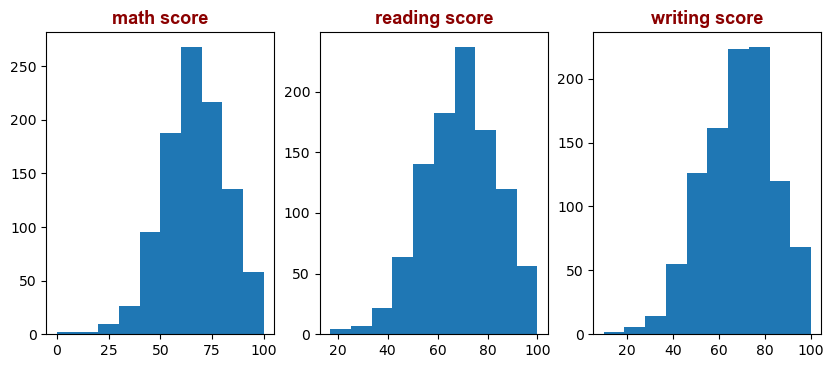

In [2]:
plt.figure(figsize=(10,4),dpi=100)
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
courses = ['math score', 'reading score' , 'writing score']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(studentPerformance[courses[i]])
    plt.title(courses[i], fontdict=title_font)

plt.show()

In [3]:
"""Her iki testede derslerin P değerleri 0.05 anlam düzeyinden düşük olduğu için normal dağılıma uymadığı görülmektedir. """

studentPerformance.dropna(inplace=True)

from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

courses = ['math score', 'reading score' , 'writing score']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in courses:
    jb_stats = jarque_bera((studentPerformance[variable]))
    norm_stats = normaltest((studentPerformance[variable]))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests


,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,15.91226,0.00035,15.40896,0.00045
1,reading score,11.38330,0.00337,11.11741,0.00385
2,writing score,13.98509,0.00092,13.60645,0.00111


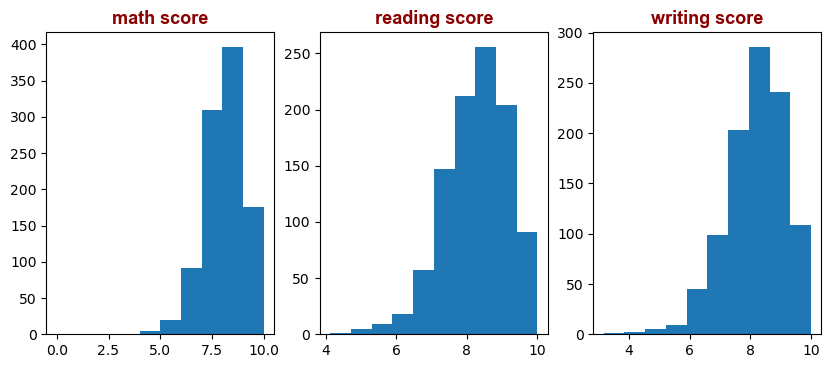

In [8]:
plt.figure(figsize=(10,4),dpi=100)

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(np.sqrt(studentPerformance[courses[i]]))
    plt.title(courses[i], fontdict=title_font)

plt.show()

In [9]:
studentPerformance.dropna(inplace=True)

from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

courses = ['math score', 'reading score' , 'writing score']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in courses:
    jb_stats = jarque_bera((np.sqrt(studentPerformance[variable])))
    norm_stats = normaltest((np.sqrt(studentPerformance[variable])))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests


,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,1233.47997,0.00000,259.47036,0.00000
1,reading score,88.00833,0.00000,70.42383,0.00000
2,writing score,141.63782,0.00000,97.39701,0.00000


Normalleştirmek için karekökü alındı, yapılan test sonucu  normal dağılıma uymadığı görülmektedir.

2-We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

,variable,normal_stats,normal_p_value
0,[Mean of courses],15.18672,0.00050


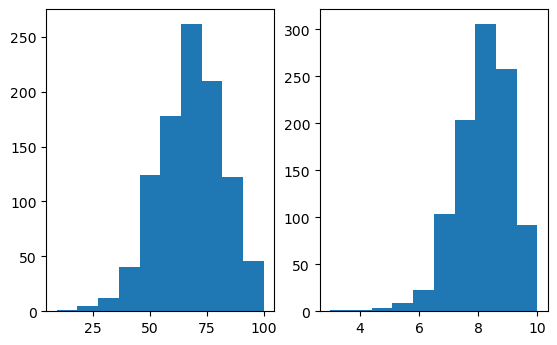

In [15]:
#P değeri 0.05 anlam düzeyinden küçük olduğu için normal dağılıma uymaz sonucuna varılır. 
#Bu soru için bir yöntem uygulamayıp dönüştürmememek daha sağlıklı olacaktır. 

studentPerformance["Mean of courses"]= (studentPerformance["math score"]+studentPerformance["reading score"]+studentPerformance["writing score"])/3

studentPerformance.dropna(inplace=True)
pd.options.display.float_format = '{:.5f}'.format
course=["Mean of courses"]
distribution_tests = pd.DataFrame(columns=["variable","normal_stats","normal_p_value"])
norm_stats= normaltest(studentPerformance["Mean of courses"])
distribution_tests = distribution_tests.append({"variable":course,
                                                "normal_stats":norm_stats[0],
                                                "normal_p_value":norm_stats[1]},ignore_index=True)


display(distribution_tests)
plt.figure(figsize=(10,4),dpi=100)

plt.subplot(1, 3, 1)
plt.hist(studentPerformance["Mean of courses"])
plt.subplot(1, 3, 2)

plt.hist(np.sqrt(studentPerformance["Mean of courses"]))
plt.show()

plt.show()


In [18]:
from sklearn.preprocessing import normalize

studentPerformance["Mean of courses Norm"] = normalize(np.array(studentPerformance["Mean of courses"]).reshape(1,-1)).reshape(-1,1)



print('Minimum Value\n-----------------',)
print(studentPerformance["Mean of courses"].min())
print('\nMaximum Value\n-----------------',)
print(studentPerformance["Mean of courses"].max())

Minimum Value
-----------------
9.0

Maximum Value
-----------------
100.0


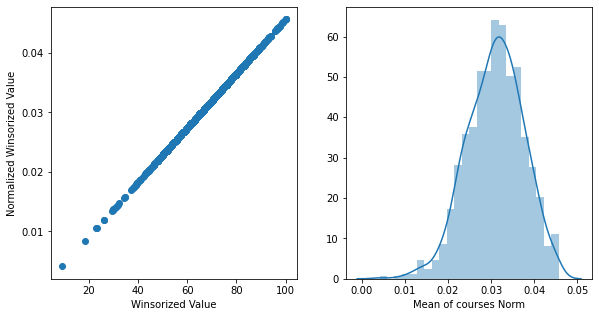

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.scatter(studentPerformance["Mean of courses"],studentPerformance["Mean of courses Norm"])
plt.xlabel("Winsorized Value")
plt.ylabel("Normalized Winsorized Value")


plt.subplot(1, 3, 2)
sns.distplot(studentPerformance["Mean of courses Norm"], kde= True)
plt.show()

3-Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

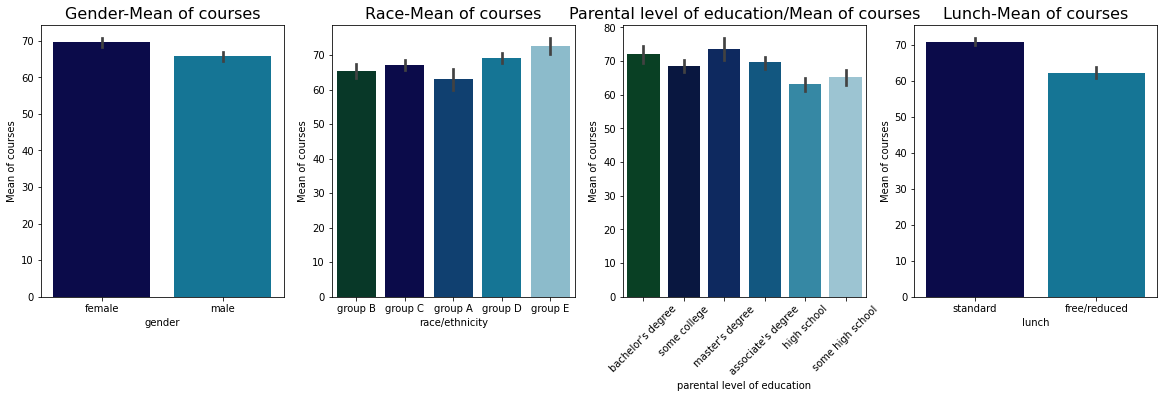

In [5]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.barplot(studentPerformance["gender"],studentPerformance["Mean of courses"],palette = 'ocean')
plt.title("Gender-Mean of courses",fontsize=16)

plt.subplot(1,4,2)
sns.barplot(studentPerformance["race/ethnicity"],studentPerformance["Mean of courses"],palette = 'ocean')
plt.title("Race-Mean of courses",fontsize=16)

plt.subplot(1,4,3)
sns.barplot(studentPerformance["parental level of education"],studentPerformance["Mean of courses"],palette = 'ocean')
plt.title("Parental level of education/Mean of courses",fontsize=16)
plt.xticks(rotation = 45)


plt.subplot(1,4,4)
sns.barplot(studentPerformance["lunch"],studentPerformance["Mean of courses"],palette = 'ocean')
plt.title("Lunch-Mean of courses",fontsize=16)

plt.show()

Grafiğe göre sınav başarısında artışlar ve azalışlar olduğu için aralarında ilişki olduğu söylenebilir. Bu yüzden veri 
aralarındaki korelasyon hesaplandı.Bileşenlerin açıklama oranları yakın olsa da en yüksek korelasyona sahip 'reading'
bileşeini tutarım.

In [23]:
main  = studentPerformance[["math score","reading score","writing score","Mean of courses"]].corr()

main

,math score,reading score,writing score,Mean of courses
math score,1.00000,0.81758,0.80264,0.91875
reading score,0.81758,1.00000,0.95460,0.97033
writing score,0.80264,0.95460,1.00000,0.96567
Mean of courses,0.91875,0.97033,0.96567,1.00000


4-Does the test preparation course have an impact on the target variable you created?

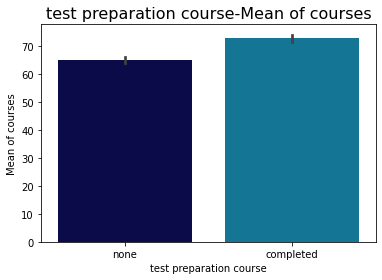

In [6]:
#Kursu tamamlamış olan öğrencilerin başarısının daha fazla olduğu görülmektedir.

sns.barplot(studentPerformance["test preparation course"],studentPerformance["Mean of courses"],palette = 'ocean')
plt.title("test preparation course-Mean of courses",fontsize=16)
plt.show()